In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
df['Survived'].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

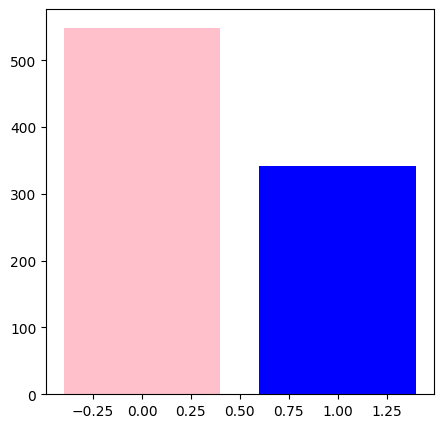

In [7]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Survived'].value_counts().keys()),list(df['Survived'].value_counts()),color=["pink","blue"])
plt.show()

In [8]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

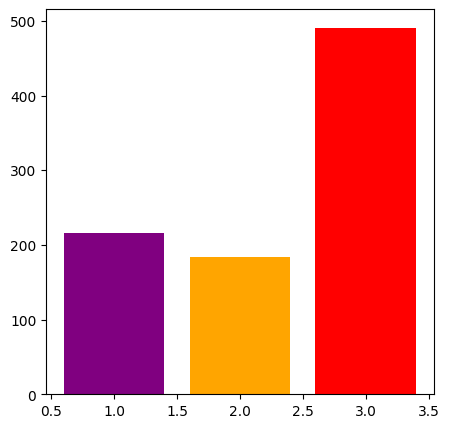

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Pclass'].value_counts().keys()),list(df['Pclass'].value_counts()),color=["red","purple","orange"])
plt.show()

In [10]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

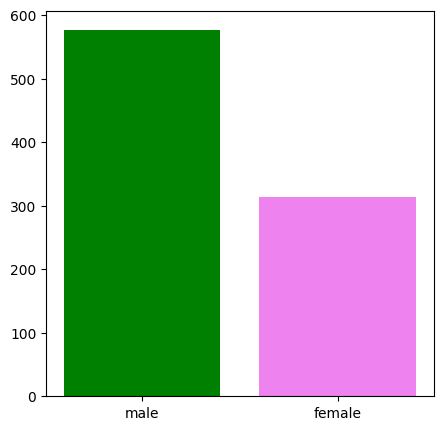

In [11]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Sex'].value_counts().keys()),list(df['Sex'].value_counts()),color=["green","violet"])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

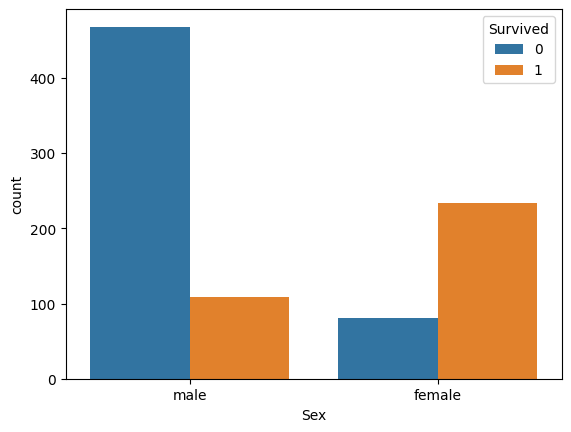

In [12]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

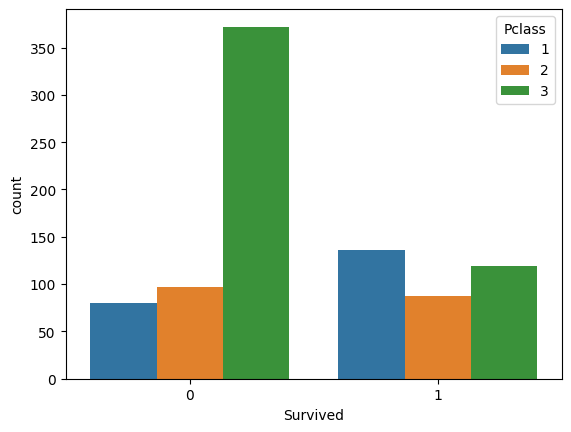

In [13]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.replace({'Sex':{'male': 0,'female' : 1} }, inplace = True)
df.head()

/tmp/ipykernel_18/688091434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male': 0,'female' : 1} }, inplace = True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [16]:
x=df[['Pclass','Sex']]
y=df['Survived']

In [17]:
x,y

(     Pclass  Sex
 0         3    0
 1         1    1
 2         3    1
 3         1    1
 4         3    0
 ..      ...  ...
 886       2    0
 887       1    1
 888       3    1
 889       1    0
 890       3    0
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)


(891, 2) (712, 2) (179, 2)
(891,) (712,) (179,)


In [19]:
from sklearn.linear_model import LogisticRegression
ML=LogisticRegression()
ML.fit(x_train,y_train)


LogisticRegression()

In [20]:
x_test_prediction=ML.predict(x_test)
print(x_test_prediction)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [21]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [22]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy scores of test are",test_accuracy,"respectively")

Accuracy scores of test are 0.7877094972067039 respectively
